# 자동 미분과 선형 회귀 실습

### 자동 미분

In [20]:
import tensorflow as tf

In [21]:
tf.__version__

'2.8.2'

**1) 임의의 2w² + 5라는 식을 세워보고, w에 대해 미분**

In [22]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

**2) gradients에 w에 대해 미분한 값이 저장된 것을 볼 수 있음**

In [23]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


### 자동 미분을 이용한 선형 회귀 구현

**1) 가중치 변수 w와 b를 임의의 값인 4와 1로 선언**

In [24]:
# 학습될 가중치 변수를 선언
W = tf.Variable(4.0)
b = tf.Variable(1.0)

**2) 가설을 wx + b 함수로 정의**

In [25]:
@tf.function
def hypothesis(x):
  return W*x + b

**3) 가설에 임의의 입력값을 넣어보기**

In [26]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


**4) 평균 제곱 오차를 손실 함수로 정의**

In [27]:
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

In [28]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

**5) 옵티마이저로 경사 하강법을 사용하며, 학습률은 0.01으로 하여 300번에 걸쳐 경사 하강법을 수행**

w와 b값이 계속 업데이트 됨에 따라서 cost가 지속적으로 줄어드는 것을 확인할 수 있음

In [29]:
optimizer = tf.optimizers.SGD(0.01)

In [30]:
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [W, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [W, b]))

  if i % 10 == 0:
    print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

epoch :   0 | W의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | W의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | W의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328163
epoch :  30 | W의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306966
epoch :  40 | W의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | W의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | W의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252897
epoch :  70 | W의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | W의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223597
epoch :  90 | W의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | W의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | W의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | W의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | W의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | W의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | W의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

**6) 학습된 w와 b의 값에 대해서 임의의 입력을 넣어 예측값을 확인**

In [31]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


### 케라스로 구현한 선형 회귀

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

**1) Sequential로 model이라는 이름의 모델을 생성**<br>
**2) add를 통해 선형 회귀를 추가**<br>
**3) 옵티마이저로 기본 경사 하강법을 사용하며, 학습률을 0.01로 하여 추가**<br>
**4) 손실 함수로는 평균 제곱 오차를 사용하도록 추가**<br>
**5) 전체 데이터에 대한 훈련 횟수는 300으로 설정** 

In [33]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 입력 x의 차원은 1, 출력 y의 차원도 1. 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 228ms/step - loss: 3712.0972 - mse: 3712.0972
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 457.8145 - mse: 457.8145
Epoch 3/300
1/1 [==============================] - 0s 9ms/step - loss: 57.3982 - mse: 57.3982
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 8.1289 - mse: 8.1289
Epoch 5/300
1/1 [==============================] - 0s 9ms/step - loss: 2.0655 - mse: 2.0655
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 1.3184 - mse: 1.3184
Epoch 7/300
1/1 [==============================] - 0s 8ms/step - loss: 1.2254 - mse: 1.2254
Epoch 8/300
1/1 [==============================] - 0s 7ms/step - loss: 1.2128 - mse: 1.2128
Epoch 9/300
1/1 [==============================] - 0s 10ms/step - loss: 1.2102 - mse: 1.2102
Epoch 10/300
1/1 [==============================] - 0s 10ms/step - loss: 1.2088 - mse: 1.2088
Epoch 11/300
1/1 [==============================] - 0s 11ms/st

**6) 최종적으로 선택된 오차를 최소화하는 직선을 그래프로 그림**

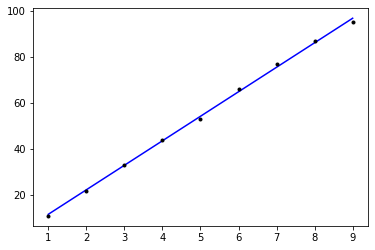

In [34]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

**7) 9시간 30분을 공부하였을 때의 시험 성적을 예측**

In [35]:
print(model.predict([9.5]))

[[102.167816]]


# 다중 입력에 대한 실습 - 다중 선형 회귀

### 케라스로 구현하는 다중 선형 회귀

**1) 입력의 차원이 3으로 바뀌었으므로 input_dim의 인자값을 3으로 변경**<br>
**2) 옵티마이저로 기본 경사 하강법을 사용하며, 학습률을 0.0001로 하여 추가**<br>
**3) 전체 데이터에 대한 훈련 횟수는 2000으로 설정**

In [36]:
# 중간 고사, 기말 고사, 가산점 점수
X = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]]) 
y = np.array([73, 82 ,72, 57, 34]) # 최종 성적

model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

sgd = optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=2000)

Epoch 1/2000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 221ms/step - loss: 11852.5977 - mse: 11852.5977
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 6256.6553 - mse: 6256.6553
Epoch 3/2000
1/1 [==============================] - 0s 6ms/step - loss: 3303.8071 - mse: 3303.8071
Epoch 4/2000
1/1 [==============================] - 0s 10ms/step - loss: 1745.2933 - mse: 1745.2933
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 922.4670 - mse: 922.4670
Epoch 6/2000
1/1 [==============================] - 0s 10ms/step - loss: 487.8894 - mse: 487.8894
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 258.2588 - mse: 258.2588
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 136.8508 - mse: 136.8508
Epoch 9/2000
1/1 [==============================] - 0s 9ms/step - loss: 72.6137 - mse: 72.6137
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 38.5945 - mse: 38.5945
Epoch 11/2000
1/1 [===========

**4) 학습된 모델에 입력 X에 대한 예측값을 확인**

In [37]:
print(model.predict(X))

[[72.921616]
 [81.97962 ]
 [72.10095 ]
 [57.11873 ]
 [33.8027  ]]


**5) 훈련할 때 사용하지 않았던 데이터를 가지고 예측값을 확인**

In [38]:
X_test = np.array([[20,99,10], [40,50,20]])
print(model.predict(X_test))

[[57.881634]
 [56.06924 ]]
